# 03: Preprocessing

### Imported Libraries

In [1]:
import sys
print('Python version: %s' % (sys.version))

# data management
print('\nData Management Libraries')
import pandas as pd
print('\tpandas version: %s' % (pd.__version__))
import numpy as np
print('\tnumpy version: %s' % (np.__version__))
import regex as re
print('\tregex version: %s' % (re.__version__))

# visualizing
print('\nVisualization Libraries')
from matplotlib import pyplot as plt
import matplotlib
print('\tmatplotlib version: %s' % (matplotlib.__version__))
import seaborn as sns
print('\tseaborn version: %s' % (sns.__version__))


# modeling
print('\nModeling Libraries')
import imblearn
print('\timblearn version: %s' % imblearn.__version__)
import sklearn
print('\tsklearn version: %s' % sklearn.__version__)

Python version: 3.8.8 (default, Feb 24 2021, 15:54:32) [MSC v.1928 64 bit (AMD64)]

Data Management Libraries
	pandas version: 1.2.3
	numpy version: 1.19.2
	regex version: 2.5.91

Visualization Libraries
	matplotlib version: 3.3.4
	seaborn version: 0.11.1

Modeling Libraries
	imblearn version: 0.8.0
	sklearn version: 0.24.1


### Import Dataframe

In [2]:
df = pd.read_csv('../data/creditcard_02.csv')

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V23,V24,V25,V26,V27,V28,Amount,Class,Time_DayAware,Time_DayAware_byHour
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.0,0.000000
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,0.0,0.000000
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.0,0.000278
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,1.0,0.000278
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,2.0,0.000556


### Reorganize, export out unscaled dataframe

In [4]:
TimeDayAware_df = df['Time_DayAware']
Amount_df = df['Amount']

df.drop(['Time'], axis=1, inplace=True)  # drop existing feature series from back of dataframe
df.drop(['Amount'], axis=1, inplace=True)  # drop existing feature series from back of dataframe
df.drop(['Time_DayAware'], axis=1, inplace=True)  # drop existing feature series from back of dataframe
df.drop(['Time_DayAware_byHour'], axis=1, inplace=True)  # drop existing feature series from back of dataframe

df.insert(0, 'Time_DayAware', TimeDayAware_df) # readd feature series back to position 0 in dataframe
df.insert(1, 'Amount', Amount_df) # readd feature series back to position 1 in dataframe

In [5]:
df.head()

,Time_DayAware,Amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,0.0,149.62,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,0.0,2.69,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,1.0,378.66,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.0,123.50,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,2.0,69.99,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


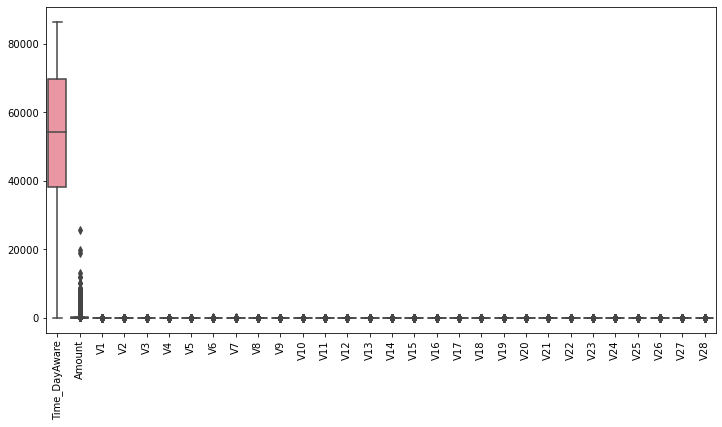

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(12,6))
sns.boxplot(data=df.drop(['Class'],axis=1,inplace=False),orient='v')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

In [7]:
df.to_csv('../data/creditcard_03_notScale.csv',index=False)

### Normalization with MixMaxScaler

In [8]:
minmax_scaler = sklearn.preprocessing.MinMaxScaler((-50,50)) # instantiate scaler
df['Time_DayAwareMinMax'] = minmax_scaler.fit_transform(df['Time_DayAware'].values.reshape(-1,1)) # add scaled feature series to dataframe

minmax_scaler = sklearn.preprocessing.MinMaxScaler((0,50)) # instantiate scaler
df['Amount_MinMax'] = minmax_scaler.fit_transform(df['Amount'].values.reshape(-1,1)) # add scaled feature series to dataframe

### Remove Outliers

In [9]:
df.drop(['Time_DayAware'], axis=1, inplace=True)  # drop existing feature series from back of dataframe
df.drop(['Amount'], axis=1, inplace=True)  # drop existing feature series from back of dataframe

In [10]:
df.loc[((df<-50)|(df>50)).any(1)] # loc any values above 50 or below -50

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Time_DayAwareMinMax,Amount_MinMax
39769,-56.407510,-72.715728,-6.605265,16.491217,34.801666,-26.160506,-19.399981,-1.501300,6.967698,9.537780,...,-1.272167,7.893082,0.767805,5.376595,0.163672,-8.358317,33.847808,0,-3.755874,2.338995
58465,-36.802320,-63.344698,-20.645794,16.715537,-20.672064,7.694002,24.956587,-4.730111,-2.687312,-8.423404,...,-10.933144,-17.173665,1.180700,-7.025783,-2.534330,-3.602479,3.450224,0,6.020973,38.255435
65423,-14.904340,12.793880,-7.888739,0.512373,-7.661829,16.614054,-31.764946,-73.216718,-6.290730,-14.741096,...,10.503090,4.245073,-1.412813,-0.730374,0.133557,-0.394370,0.942177,0,9.694669,0.973097
138215,-10.883622,9.227375,-4.925972,0.308093,-4.086120,11.221283,-21.926934,-50.943369,-6.105803,-8.640273,...,7.220158,3.332339,-1.676396,-0.939542,-0.283478,-0.343275,0.442316,0,45.538091,0.396051
138706,-11.636704,9.127335,-6.055225,0.479269,-5.035106,11.423921,-21.701600,-50.688419,-5.945202,-8.531770,...,7.357255,3.407646,-1.641784,-1.395530,-0.359249,-0.022631,0.242548,0,45.837867,0.594076
139217,-12.734063,8.910837,-6.917461,0.667324,-5.888499,11.607923,-21.570650,-50.420090,-5.887886,-8.504663,...,7.248763,2.875170,-1.580649,-1.434954,-0.357635,0.208635,0.020636,0,46.142272,0.792101
151296,-34.549296,-60.464618,-21.340854,16.875344,-19.229075,6.335259,24.422716,-4.964566,0.188912,-8.908182,...,-9.499423,-16.513186,0.744341,-7.081325,-2.604551,-3.550963,3.250802,0,-39.715040,36.802542
228723,-32.543140,-50.383269,-10.733302,9.571705,8.656575,-6.377450,6.263440,0.235906,-2.499284,-3.787952,...,-0.242650,22.528412,-1.853583,4.301757,-0.076711,-3.466007,1.278494,0,18.554828,14.337617
274771,-35.548539,-31.850484,-48.325589,15.304184,-113.743307,73.301626,120.589494,-27.347360,-3.872425,-12.005487,...,5.712303,-1.581098,4.584549,4.554683,3.415636,31.612198,-15.430084,0,42.360934,50.000000


In [11]:
drop_index = df.loc[((df<-50)|(df>50)).any(1)]
df = df[~df.index.isin(drop_index.index)].copy() # filter out by selecting indexes not in the outlier index

### Reorganize, export out unscaled dataframe

In [12]:
TimeDayAwareMinMax_df = df['Time_DayAwareMinMax']
AmountMinMax_df = df['Amount_MinMax']

df.drop(['Time_DayAwareMinMax'], axis=1, inplace=True)  # drop existing feature series from back of dataframe
df.drop(['Amount_MinMax'], axis=1, inplace=True)  # drop existing feature series from back of dataframe

df.insert(0, 'Time_DayAwareMinMax', TimeDayAwareMinMax_df) # readd feature series back to position 0 in dataframe
df.insert(1, 'Amount_MinMax', AmountMinMax_df) # readd feature series back to position 1 in dataframe

In [13]:
df.head()

,Time_DayAwareMinMax,Amount_MinMax,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-50.000000,0.291190,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-50.000000,0.005235,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-49.998843,0.736946,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-49.998843,0.240355,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-49.997685,0.136214,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


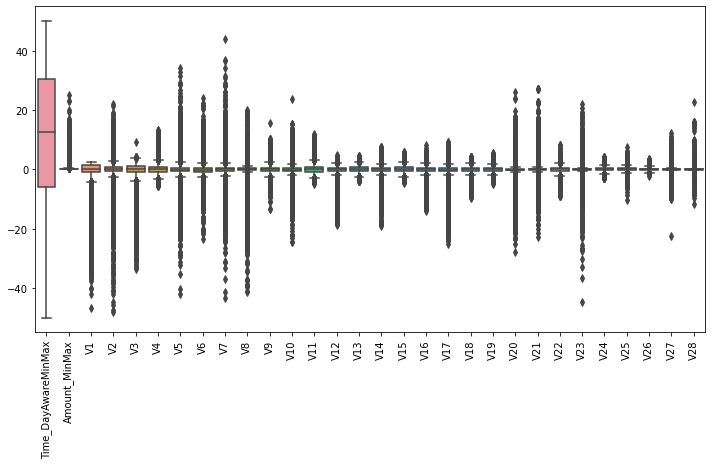

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(12,6))
sns.boxplot(data=df.drop(['Class'],axis=1,inplace=False),orient='v')
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

### Output Adjusted Dataframe

In [15]:
df.to_csv('../data/creditcard_03_scaled.csv',index=False)